In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score


In [ ]:
# data = pd.read_csv('../Data/Sequencing/sequenced_data.csv')
data = pd.read_csv('../Data/Processed Data/complete_data.csv')
data = data.copy()
data

,Gene Name,Solubility(%),Yield(uM),Yield(ug/ml),Minus Sol,TF Sol,GroE Sol,KJE Sol,Minus(uM),TF(uM),...,Gene product description,Cell location,Structure (PDB) id,SCOP assignment,Sequence,Sequence length,Sequence mass,Organism,UP_ID,UP_NAME
0,thrB,32.0,2.3,78.0,NaN,NaN,NaN,NaN,NaN,NaN,...,homoserine kinase,Cytoplasmic,NaN,54211; Ribosomal protein S5 domain 2-like 5506...,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,310,33624,Escherichia coli (strain K12 / DH10B),B1XBC8,KHSE_ECODH
1,thrC,18.0,1.7,78.0,46.53,45.80,83.44,63.61,0.863,0.761,...,threonine synthase,Cytoplasmic,NaN,53686; Tryptophan synthase beta subunit-like P...,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,428,47114,Escherichia coli (strain K12),"['P00934', 'Q6LEK8']",THRC_ECOLI
2,yaaX,78.0,1.2,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,predicted protein,Periplasmic,NaN,NaN,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,98,11355,Escherichia coli (strain K12),P75616,YAAX_ECOLI
3,yaaA,7.0,2.4,71.0,14.01,26.65,52.96,17.69,1.199,1.014,...,conserved protein,Cytoplasmic,NaN,NaN,MLILISPAKTLDYQSPLTTTRYTLPELLDNSQQLIHEARKLTPPQI...,258,29586,Escherichia coli (strain K12 / DH10B),B1XBD1,YAAA_ECODH
4,talB,85.0,2.7,94.0,NaN,NaN,NaN,NaN,NaN,NaN,...,transaldolase B,Cytoplasmic,1ONR,51569; Aldolase,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,317,35219,Escherichia coli (strain K12),"['P0A870', 'P30148']",TALB_ECOLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155,ytfP,98.0,0.9,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,conserved protein,Cytoplasmic,NaN,NaN,MRIFVYGSLRHKQGNSHWMTNAQLLGDFSIDNYQLYSLGHYPGAVP...,113,12866,Escherichia coli (strain K12),"['P0AE48', 'P39323', 'Q2M683']",YTFP_ECOLI
3156,yzfA,88.0,0.4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,predicted protein,Cytoplasmic,NaN,NaN,MHMVTYPCLTSRRFQLALIHRRVVDKRTSMHSRTASESTGARIHRP...,89,10585,Escherichia coli (strain K12),A0A385XK32,A0A385XK32_ECOLI
3157,chpB,94.0,0.4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,toxin of the ChpB-ChpS toxin-antitoxin system,Cytoplasmic,NaN,NaN,MRITIKRWGNSAGMVIPNIVMKELNLQPGQSVEAQVSNNQLILTPI...,83,9272,Escherichia coli (strain K12),"['P08365', 'P76803', 'Q2M681']",CHPS_ECOLI
3158,nrdG,69.0,0.4,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,anaerobic ribonucleotide reductase activating ...,Cytoplasmic,NaN,NaN,MNYHQYYPVDIVNGPGTRCTLFVSGCVHECPGCYNKSTWRVNSGQP...,154,17446,Escherichia coli (strain K12),"['P0A9N8', 'P39329', 'Q2M670']",NRDG_ECOLI


In [ ]:
# X = data[['Yield(uM)','Yield(ug/ml)','Calculated MW(kDa)','Calculated pI', 'Sequence length', 'Sequence mass','Type of gene product Integer']]
X = data[['Yield(uM)','Yield(ug/ml)','Calculated MW(kDa)','Calculated pI', 'Sequence length', 'Sequence mass',]]
# X = data[['Yield(uM)','Yield(ug/ml)','Calculated MW(kDa)','Calculated pI', 'Type of gene product Integer']]
y = data['Solubility(%)']

In [ ]:
def normal(column):
     return column / column.abs().max()

In [ ]:
def normalize(col_data):
    return (col_data - col_data.min())/(col_data.max()-col_data.min())

In [ ]:
for column in X:
    X[column] = normal(X[column])
X = round(X,2)

/tmp/ipykernel_638/1193993941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = normal(X[column])


In [ ]:
# y = round(normalize(y),2)
y = normalize(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators= 100, random_state=100)

In [ ]:
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

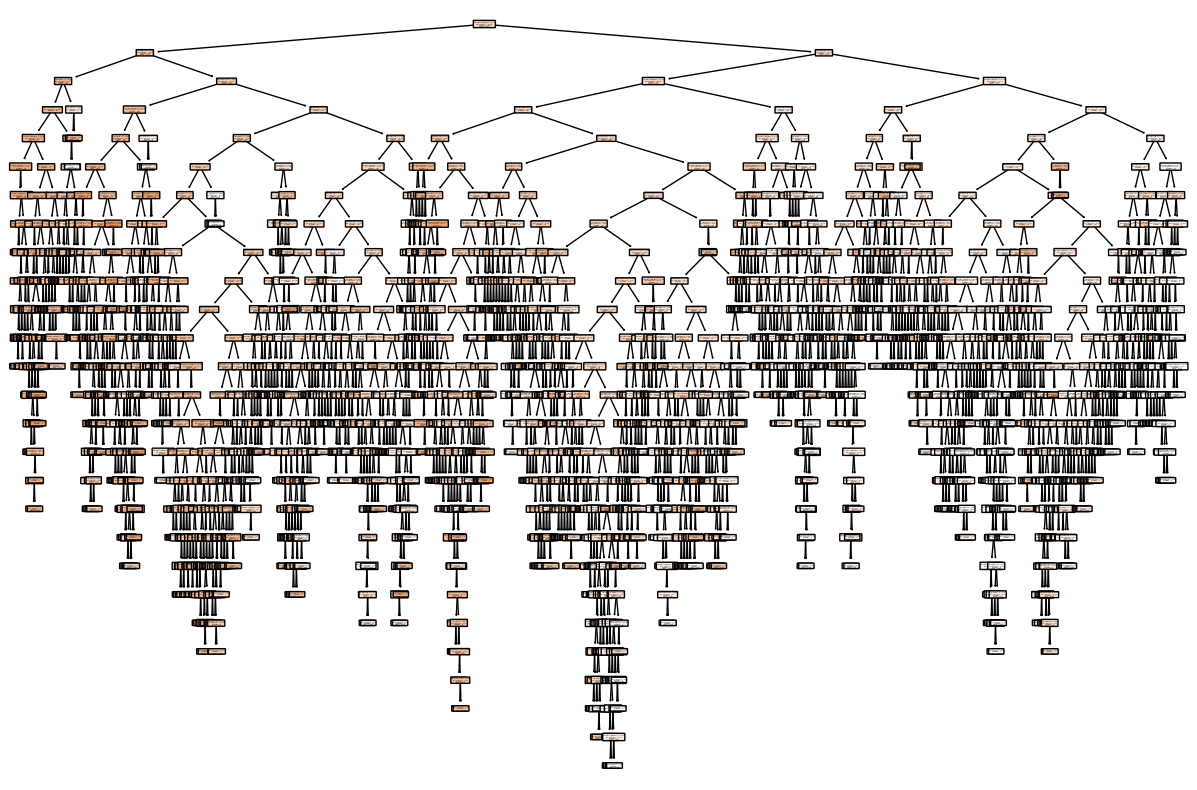

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=X.columns,
           
          filled=True, rounded=True)

plt.show()

In [ ]:
print("mean squared error :",metrics.mean_squared_error(y_test, predictions))

mean squared error : 0.04077379940203322


In [ ]:
# rf_model.save('../models/models_RF')
joblib.dump(rf_model, '../models/models_RF')

['../models/models_RF']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ea8948f-b978-492f-a6dd-8ac5feb4b472' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>